#Import and Filter:

###Are the trends of the beer world true!?

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
## Dataset link: 'https://www.kaggle.com/rdoume/beerreviews'
df_raw = pd.read_csv('beer_reviews.csv')

In [ ]:
## Preview DataFrame
df_raw

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [ ]:
## Remove unwanted or unnecessary columns and check for missing values
cols = ['brewery_id', 'review_time', 'review_profilename', 'beer_beerid', 'beer_name']

df = df_raw.drop(columns=cols, axis=1)
df.isnull().sum()

brewery_name            15
review_overall           0
review_aroma             0
review_appearance        0
beer_style               0
review_palate            0
review_taste             0
beer_abv             67785
dtype: int64

In [ ]:
## Remove any rows containing null values
df = df.dropna(axis=0)
df.isnull().sum()

brewery_name         0
review_overall       0
review_aroma         0
review_appearance    0
beer_style           0
review_palate        0
review_taste         0
beer_abv             0
dtype: int64

In [ ]:
## Preview filtered data
df

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,Vecchio Birraio,1.5,2.0,2.5,Hefeweizen,1.5,1.5,5.0
1,Vecchio Birraio,3.0,2.5,3.0,English Strong Ale,3.0,3.0,6.2
2,Vecchio Birraio,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,6.5
3,Vecchio Birraio,3.0,3.0,3.5,German Pilsener,2.5,3.0,5.0
4,Caldera Brewing Company,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,7.7
...,...,...,...,...,...,...,...,...
1586609,The Defiant Brewing Company,5.0,4.0,3.5,Pumpkin Ale,4.0,4.0,5.2
1586610,The Defiant Brewing Company,4.0,5.0,2.5,Pumpkin Ale,2.0,4.0,5.2
1586611,The Defiant Brewing Company,4.5,3.5,3.0,Pumpkin Ale,3.5,4.0,5.2
1586612,The Defiant Brewing Company,4.0,4.5,4.5,Pumpkin Ale,4.5,4.5,5.2


#One-Sample t-test:

According to [Live Science](https://www.livescience.com/32735-how-much-alcohol-is-in-my-drink.html#:~:text=On%20average%2C%20the%20ABV%20for,how%20each%20beverage%20is%20made.), the average percent abv (alcohol by volume) in a 12-oz beer is 4.5%.

$H_0: \mu = 4.5$ %

$H_a: \mu \neq 4.5$ %

In [ ]:
df['beer_style'].value_counts()

American IPA                        113162
American Double / Imperial IPA       85124
American Pale Ale (APA)              58081
Russian Imperial Stout               53432
American Double / Imperial Stout     50146
                                     ...  
English Pale Mild Ale                  649
Faro                                   609
Roggenbier                             395
Happoshu                               237
Kvass                                  229
Name: beer_style, Length: 104, dtype: int64

In [ ]:
## Create DataFrame containing one of each style of beer
abv = df.drop_duplicates(subset='beer_style')
abv

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,Vecchio Birraio,1.5,2.0,2.5,Hefeweizen,1.5,1.5,5.0
1,Vecchio Birraio,3.0,2.5,3.0,English Strong Ale,3.0,3.0,6.2
2,Vecchio Birraio,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,6.5
3,Vecchio Birraio,3.0,3.0,3.5,German Pilsener,2.5,3.0,5.0
4,Caldera Brewing Company,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,7.7
...,...,...,...,...,...,...,...,...
60475,The Bruery,4.0,3.5,4.0,Gose,3.5,3.5,5.0
65648,Guangzhou Zhujiang Brewery Co. Ltd.,2.0,2.0,2.5,Japanese Rice Lager,1.5,2.0,4.3
112854,Asahi Breweries Ltd,1.0,1.5,1.0,Happoshu,1.0,1.0,5.0
191848,New Belgium Brewing,4.0,4.5,4.0,Sahti,4.0,4.5,7.2


In [ ]:
## Conduct t-test with given population mean
abv_tstat, abv_pval = stats.ttest_1samp(abv['beer_abv'], 4.5)

print('T-Statistic: ', abv_tstat)
print('P-Value: ', abv_pval)

T-Statistic:  7.76052028935026
P-Value:  6.407219995129523e-12


In [ ]:
## Calculate 1 sample t-test confidence interval
n = len(abv['beer_abv'])
abv_mean = abv['beer_abv'].mean()
abv_se = abv['beer_abv'].std()/np.sqrt(n)

abv_lower, abv_upper = stats.t.interval(alpha=0.05, df=n-1, loc=abv_mean, scale=abv_se)

print('Lower Limit: ', abv_lower)
print('Upper Limit: ', abv_upper)

Lower Limit:  6.041450840243728
Upper Limit:  6.066626082833196


#Two-Sample t-test:

We want to determine if the rating given to a beer for taste is related to the ratings given to the beer's overall.

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 \neq \mu_2$

In [ ]:
## Further filter data to only 'American IPA' beer style and preview
ipa = df[df['beer_style'] == 'American IPA']
ipa

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
257,Caldera Brewing Company,4.0,4.0,4.0,American IPA,4.0,4.5,6.1
265,Caldera Brewing Company,4.0,4.0,4.0,American IPA,4.0,4.5,6.1
330,Caldera Brewing Company,4.0,4.0,4.0,American IPA,4.0,4.0,6.1
337,Caldera Brewing Company,4.0,4.0,4.0,American IPA,4.0,3.5,6.1
338,Caldera Brewing Company,4.5,4.0,4.0,American IPA,4.0,4.0,6.1
...,...,...,...,...,...,...,...,...
1586560,The Defiant Brewing Company,4.0,4.0,4.0,American IPA,4.0,4.0,6.2
1586561,The Defiant Brewing Company,4.0,3.5,4.5,American IPA,4.5,3.5,6.2
1586562,The Defiant Brewing Company,3.5,4.0,4.0,American IPA,4.0,4.0,6.2
1586563,The Defiant Brewing Company,4.0,4.5,4.0,American IPA,4.0,4.5,6.2


In [ ]:
## Look at value counts to remove outliers
ipa['brewery_name'].value_counts()

Sierra Nevada Brewing Co.          9417
Dogfish Head Brewery               4106
Bell's Brewery, Inc.               2737
Stone Brewing Co.                  2729
Victory Brewing Company            2322
                                   ... 
Arrow Brewing Company & Oak bar       1
Lake Bluff Brewing Company            1
Grassroots Brewing                    1
Liquid Hero Brewery                   1
Aztec Brewing Company                 1
Name: brewery_name, Length: 1255, dtype: int64

In [ ]:
## Extract breweries that have more than 1000 reviews on their American IPA
breweries = []

for item in ipa['brewery_name'].unique():
  
  if ipa[ipa['brewery_name']==item].brewery_name.count() > 1000:
    breweries.append(item)

In [ ]:
## Create our final DataFrame based on the condition above
top_brews = ipa[ipa['brewery_name'].isin(breweries)]
top_brews

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
12663,Founders Brewing Company,4.5,4.5,4.5,American IPA,4.5,4.5,7.2
13216,Founders Brewing Company,4.0,4.5,4.0,American IPA,4.5,4.5,7.2
13722,Founders Brewing Company,4.0,4.5,3.5,American IPA,4.5,4.0,7.2
16147,Founders Brewing Company,4.0,4.0,3.5,American IPA,4.0,4.0,4.8
16148,Founders Brewing Company,3.5,4.5,4.5,American IPA,3.5,3.5,4.8
...,...,...,...,...,...,...,...,...
1554096,Victory Brewing Company,4.0,4.0,4.0,American IPA,4.0,4.0,6.8
1554097,Victory Brewing Company,4.0,4.0,4.0,American IPA,4.0,3.5,6.8
1554098,Victory Brewing Company,4.0,4.5,4.0,American IPA,4.0,4.0,6.8
1554099,Victory Brewing Company,4.0,4.0,3.5,American IPA,3.5,4.0,6.8


In [ ]:
## Begin our hypothesis test
# Two-sample t-test
top_tstat, top_pval = stats.ttest_ind(a=top_brews['review_overall'], b=top_brews['review_taste'])

print('T-Statistic: ', top_tstat)
print('P-Value: ', top_pval)

T-Statistic:  5.2375297708424595
P-Value:  1.630557013338191e-07


In [ ]:
################################################################################ Confidence Interval / Summary
print(top_brews['review_overall'].mean())
print(top_brews['review_taste'].mean())

4.084968765016819
4.066641037962518


#Chi-Square test:

In [ ]:
# Look for two categories
df[df['beer_style'].str.contains('Lager')].beer_style.value_counts()

American Adjunct Lager        28978
Euro Pale Lager               17559
Light Lager                   13261
American Amber / Red Lager     8610
American Pale Lager            8367
Vienna Lager                   8337
Munich Helles Lager            7452
Munich Dunkel Lager            7244
Euro Dark Lager                4406
Dortmunder / Export Lager      4232
Euro Strong Lager              2715
Japanese Rice Lager            1533
Name: beer_style, dtype: int64

In [ ]:
## Let's pick two lagers
lager = df[df['beer_style'].isin(['Munich Helles Lager', 'Vienna Lager'])]
lager

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
1604,Harboes Bryggeri A/S,3.0,3.0,3.0,Vienna Lager,3.0,3.0,6.0
2783,Crescent City Brewhouse,3.5,3.5,4.0,Vienna Lager,3.5,3.5,5.8
2784,Crescent City Brewhouse,3.5,3.0,3.5,Vienna Lager,3.5,3.5,5.8
2785,Crescent City Brewhouse,2.5,3.0,4.0,Vienna Lager,3.5,3.5,5.8
2786,Crescent City Brewhouse,4.0,2.0,4.0,Vienna Lager,4.0,4.0,5.8
...,...,...,...,...,...,...,...,...
1576408,Twisted X Brewing Company,2.5,2.5,3.0,Vienna Lager,3.0,2.5,5.4
1578133,Redwood Lodge,4.0,3.5,3.5,Munich Helles Lager,3.5,3.5,5.6
1578134,Redwood Lodge,4.0,3.5,3.5,Munich Helles Lager,3.5,3.5,5.6
1578135,Redwood Lodge,3.0,3.5,4.0,Munich Helles Lager,4.0,3.5,5.6


In [ ]:
lager['taste_score'] = ['High' if score >= lager['review_taste'].mean() else 'Low' for score in lager['review_taste']]
lager # Change high to a 4 to 5 star

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv,taste_score
1604,Harboes Bryggeri A/S,3.0,3.0,3.0,Vienna Lager,3.0,3.0,6.0,Low
2783,Crescent City Brewhouse,3.5,3.5,4.0,Vienna Lager,3.5,3.5,5.8,Low
2784,Crescent City Brewhouse,3.5,3.0,3.5,Vienna Lager,3.5,3.5,5.8,Low
2785,Crescent City Brewhouse,2.5,3.0,4.0,Vienna Lager,3.5,3.5,5.8,Low
2786,Crescent City Brewhouse,4.0,2.0,4.0,Vienna Lager,4.0,4.0,5.8,High
...,...,...,...,...,...,...,...,...,...
1576408,Twisted X Brewing Company,2.5,2.5,3.0,Vienna Lager,3.0,2.5,5.4,Low
1578133,Redwood Lodge,4.0,3.5,3.5,Munich Helles Lager,3.5,3.5,5.6,Low
1578134,Redwood Lodge,4.0,3.5,3.5,Munich Helles Lager,3.5,3.5,5.6,Low
1578135,Redwood Lodge,3.0,3.5,4.0,Munich Helles Lager,4.0,3.5,5.6,Low


In [ ]:
joint = pd.crosstab(lager['beer_style'], lager['taste_score'])
joint

taste_score,High,Low
beer_style,,
Munich Helles Lager,3722,3730
Vienna Lager,3928,4409


In [ ]:
results = stats.chi2_contingency(joint)
print('P-Value: ', results[1])

P-Value:  0.0004039293120585854


In [ ]:
print(results[3])

[[3610.60231807 3841.39768193]
 [4039.39768193 4297.60231807]]


#Visualizations:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
top_styles = pd.DataFrame(df['beer_style'].value_counts().head(10)).reset_index()
top_styles.columns = ['Beer Style', 'Review Count']

In [ ]:
total_ipa = (top_styles['Review Count'][0:2].sum() / df['beer_style'].value_counts().sum())*100
total_ipa

13.055318162724335

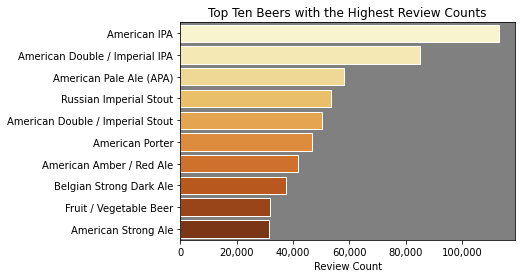

In [ ]:
fig, ax = plt.subplots()

sns.set_theme(style='whitegrid')
ax = sns.barplot(x=top_styles['Review Count'], y=top_styles['Beer Style'], palette='YlOrBr')

ax.set_title('Top Ten Beers with the Highest Review Counts')
ax.set_ylabel('')
ax.set_xticklabels(['0', '20,000', '40,000', '60,000', '80,000', '100,000'])
ax.set_facecolor('gray')

plt.show()

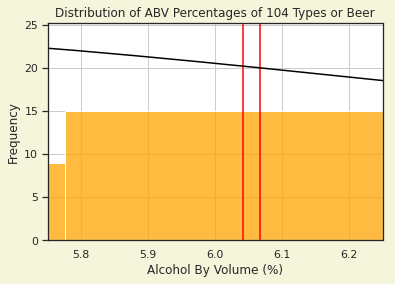

In [ ]:
## 1-sample t-test visualization
fig, ax = plt.subplots()
fig.set_facecolor('beige')
sns.set_theme(style='white')

ax1 = sns.histplot(abv['beer_abv'], bins=25, color='orange')
ax2 = ax1.twinx()
ax2 = sns.kdeplot(abv['beer_abv'], color='black')

ax1.set_xlim(left=5.75, right=6.25) ## Left = 5.75, Right = 6.25; arguments to view CI
ax1.set_title('Distribution of ABV Percentages of 104 Types or Beer')
ax1.set_xlabel('Alcohol By Volume (%)')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('')
ax2.set_yticks([])

lower = ax1.axvline(abv_lower, c='red')
upper = ax1.axvline(abv_upper, c = 'red')

plt.show()